# Exercise 4a - Image Filtering

The purpose of this exercise is to illustrate different image filtering techniques.

In [1]:
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

scikit-image and SciPy contain a large number of image filtering functions. In this exercise, we will explore some of the fundamental functions and touch upon more advanced filters as well.

### Filtering using correlation

simple imagen

In [2]:
from scipy.ndimage import correlate
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [5]:
weights = [[0, 1, 0], # simple filter
		   [1, 2, 1],
		   [0, 1, 0]]
           
res_img = correlate(input_img, weights)
#print(res_img)    # da bien

The term "correlate" in the context of image processing and signal processing refers to a mathematical operation where an array (such as an image) is processed with a kernel (a smaller matrix). This operation is often used to detect patterns, apply filters, or extract features in the array.

#### Exercise 1

Print the value in position (3, 3) in res_img. Explain the value?

In [ ]:
print(f"Full matrix: \n {res_img}")
print(f"Value (3, 3): \n {res_img[4, 3]}")# ten encuenta que el 0 cuenta
                         #    (filas, colmnas)(y,x)

Full matrix: 
 [[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
Value (3, 3): 
 133


### Border handling

When the value of an output pixel at the boundary of the image is computed, a portion of the filter is usually outside the edge of the input image.
One way to handle this, is to assume that the value of the off-the-edge pixels of the image are 0. This is called zero padding. Since 0 is the value of a black pixel, the output image will have a dark edge.
- Another approach is to reflect the actual pixel values of the image to the off-the-edge-pixel. This is the default behaviour of correlate. 
- We can also set the off-the-edge-pixel to have a constant value (for example 10) by:

#### Exercise 2

Compare the output images when using reflect and constant for the border. Where and why do you see the differences.

In [7]:
reflection_img = correlate(input_img, weights, mode='reflect')
constant_img = correlate(input_img, weights, mode='constant', cval = 10)

reflect Mode:

The kernel interacts with values that are "mirrored" from the edge, ensuring the boundary computations use values similar to the image content.

In [8]:
print(reflection_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


The kernel interacts with the constant value (10), which is often very different from the actual edge pixel values.

In [9]:
print(constant_img)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


En tu ejemplo:

- reflection_img tiene transiciones suaves y resultados consistentes en los bordes.
- constant_img muestra valores más extremos o distorsionados en los bordes debido al relleno con 10.

### Mean filtering

Now we will try some filters on an artificial image with different types of noise starting with the mean filter.

#### Exercise 3

uint8
float64


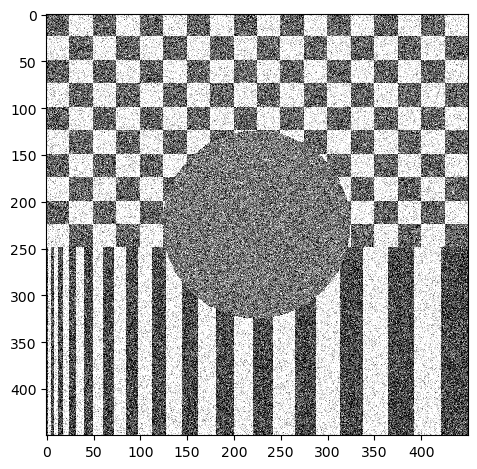

In [ ]:
img_org = io.imread('data/Gaussian.png')
#print(img_org.dtype)
img_org = rgb2gray(img_org) # recuerda que al pasar a rgb2gray tmb lo pasas a float
#print(img_org.dtype)
io.imshow(img_org)
io.show()

Create a mean filter with normalized weights:

Use correlate with the Gaussian.png image and the mean filter. Show the resulting image together with the input image. What do you observe?

Try to change the size of the filter to 10, 20, 40 etc.. What do you see?

In [ ]:
#Sirve principalmente para suavizar la imagen, reduciendo el ruido al calcular 
# el promedio local de los píxeles en una ventana definida.

def apply_mean_filter(img, size):
    # crea una amtriz de unos de ese tamaño size
    weights = np.ones([size, size])
    # se hace la media de cada pizxel entre el ottal de pixeles del kernel
    weights = weights / np.sum(weights)
    # aplicas el filtro con correlation metiendo la imagen y el kernel
    out_img = correlate(img, weights, mode='reflect')
    return out_img

In [23]:
gauss5  = apply_mean_filter(img_org, size = 5)
gauss10 = apply_mean_filter(img_org, size = 10)
gauss20 = apply_mean_filter(img_org, size = 20)
gauss40 = apply_mean_filter(img_org, size = 30)

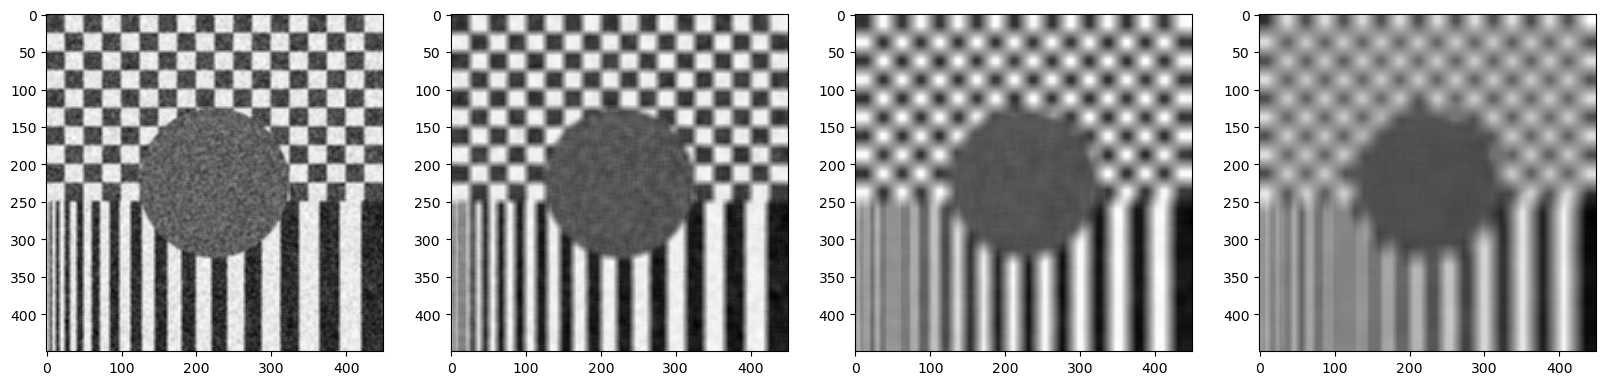

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gauss5, cmap = 'gray')
ax[1].imshow(gauss10, cmap = 'gray')
ax[2].imshow(gauss20, cmap = 'gray')
ax[3].imshow(gauss40, cmap = 'gray')
plt.show()

What happens to the noise and what happens to the places in image where there are transitions from light to dark areas?


Cuanto más grande es el kernel en un filtro promedio, más suave será la imagen, porque se promedian más píxeles en cada región. Esto tiene dos efectos principales:
- Mayor suavizado:

Reduce más el ruido y los detalles pequeños.
La imagen se vuelve más borrosa.

- Pérdida de detalles:

Los bordes y las estructuras finas se desdibujan o desaparecen, ya que el promedio incluye píxeles más alejados.

### Median filtering

#### Exercise 4

We can create a footprint which marks the size of the median filter and do the filtering like this:

Filter the Gaussian.png image with the median filter with different size (5, 10, 20...). What do you observe? What happens with the noise and with the lighth-dark transitions?

In [31]:
from skimage.filters import median

ESTOS SE USAN SOBRETODO PARA ELIMINAR EL RUIDO IMPULSIVO  preservando los bordes mejor que un filtro promedio, MEDIA

In [ ]:
def apply_median_filter(img, size): # size again the kernel size
    footprint = np.ones([size, size]) # esto es un kernel que utilizará luego 
    #se concatena asi , no con el correlate, y auqneu sean 1 el kernell luego seran pixeles de la img.
    med_img = median(img, footprint)
    return med_img

In [14]:
median5  = apply_median_filter(img_org, size = 5)
median10 = apply_median_filter(img_org, size = 10)
median20 = apply_median_filter(img_org, size = 20)
median40 = apply_median_filter(img_org, size = 30)

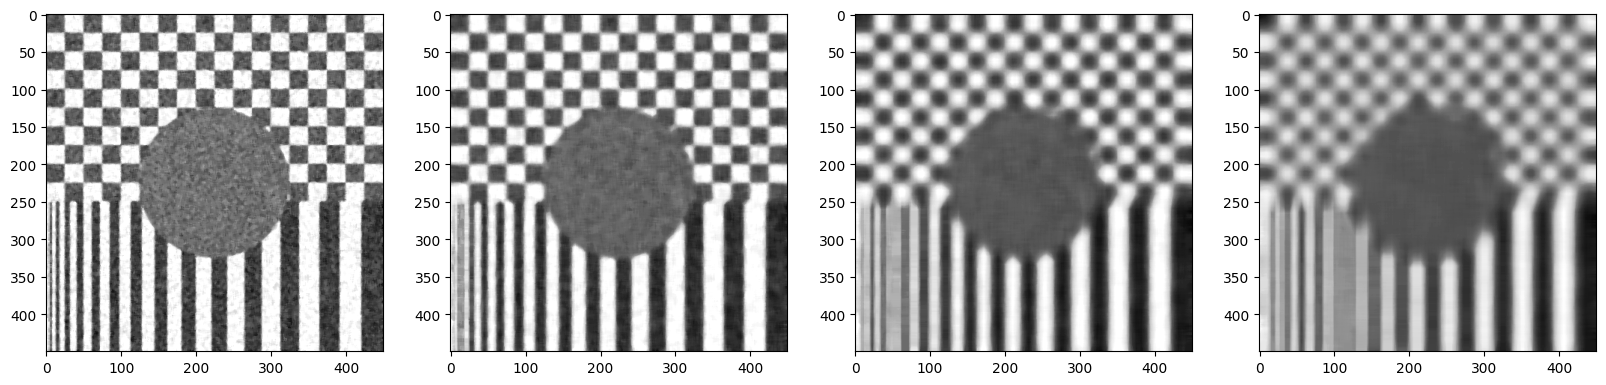

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(median5, cmap = 'gray')
ax[1].imshow(median10, cmap = 'gray')
ax[2].imshow(median20, cmap = 'gray')
ax[3].imshow(median40, cmap = 'gray')
plt.show()

conforme aumentas el size , El filtro mediano actuará sobre ventanas más grandes de píxeles, por lo que el ruido será eliminado de manera más efectiva.la imagen se suaviza más, pero se corre el riesgo de perder detalles finos y bordes.Pero El filtro será más eficiente en eliminar ruido impulsivo (como puntos blancos o negros) a medida que aumenta el tamaño del kernel.

### Compare mean and median filtering

#### Exercise 5

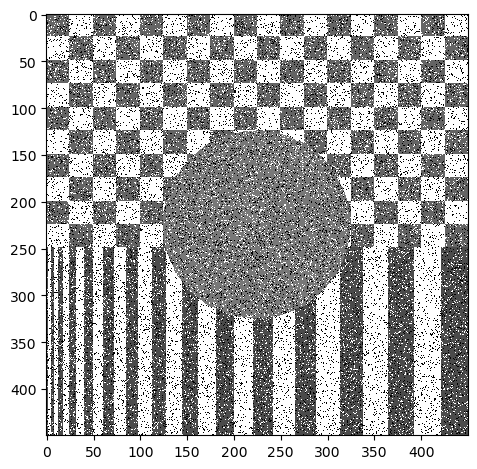

In [35]:
img_org = io.imread('data/SaltPepper.png')
img_org = rgb2gray(img_org)
mean5   = apply_mean_filter(img_org, size = 5)
median5 = apply_median_filter(img_org, size = 5)
mean20  = apply_mean_filter(img_org, size =20)
median20 = apply_median_filter(img_org, size = 20)
io.imshow(img_org, cmap = 'gray')
plt.show()

In [36]:
median20

array([[0.39215686, 0.39215686, 0.39215686, ..., 1.        , 1.        ,
        1.        ],
       [0.39215686, 0.39215686, 0.39215686, ..., 1.        , 1.        ,
        1.        ],
       [0.39215686, 0.39215686, 0.39215686, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.29411765, 0.29411765,
        0.29411765],
       [1.        , 1.        , 1.        , ..., 0.29411765, 0.29411765,
        0.29411765],
       [1.        , 1.        , 1.        , ..., 0.29411765, 0.29411765,
        0.29411765]])

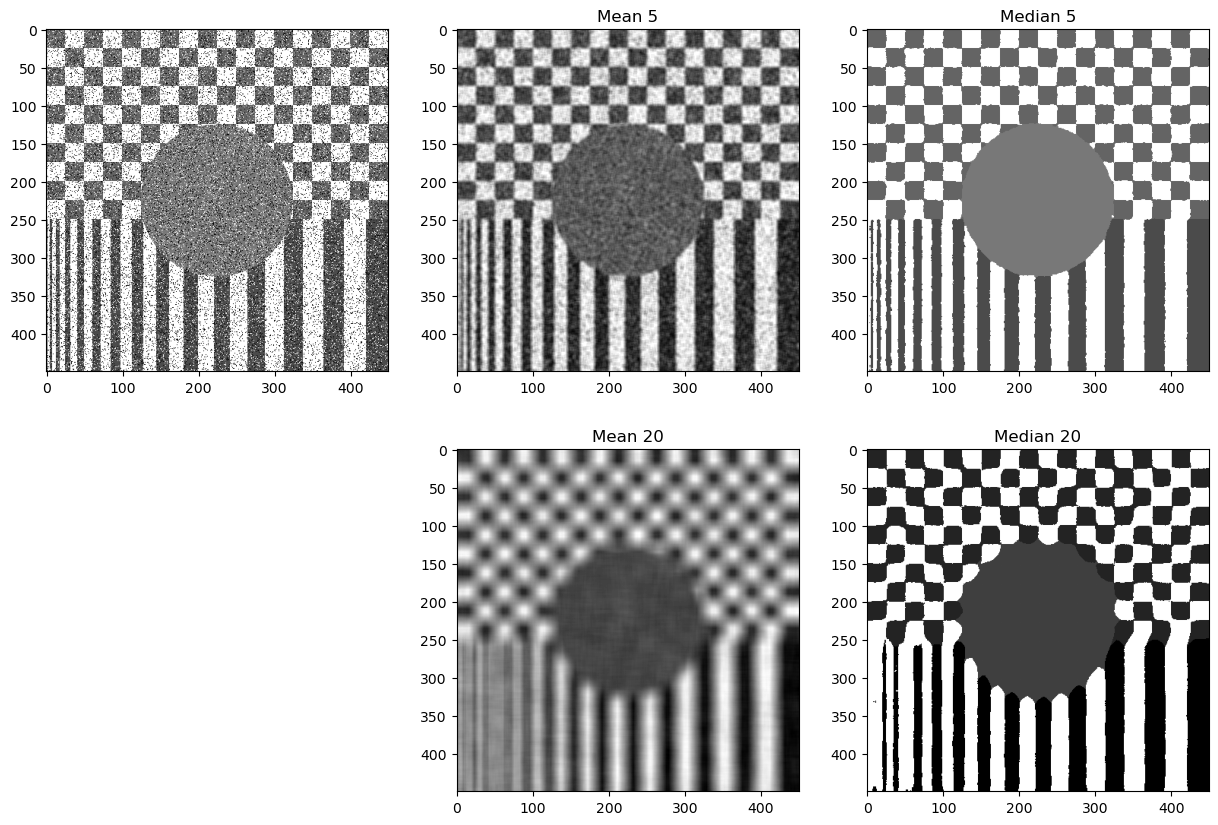

In [37]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
ax[0,0].imshow(img_org, cmap = 'gray')
ax[0,1].imshow(mean5, cmap = 'gray')
ax[0,1].set_title('Mean 5')
ax[0,2].imshow(median5, cmap = 'gray')
ax[0,2].set_title('Median 5')
ax[1,0].set_axis_off()
ax[1,1].imshow(mean20, cmap = 'gray')
ax[1,1].set_title('Mean 20')
ax[1,2].imshow(median20, cmap = 'gray')
ax[1, 2].set_title('Median 20')
plt.show()

What do you observe? Can they remove the noise and what happens to the image?

### Gaussian filter

The Gaussian filter is widely used in image processing. It is a smoothing filter that removes high frequencies from the image.

#### Exercise 6
Try to change the sigma value and observe the result.



In [38]:
from skimage.filters import gaussian

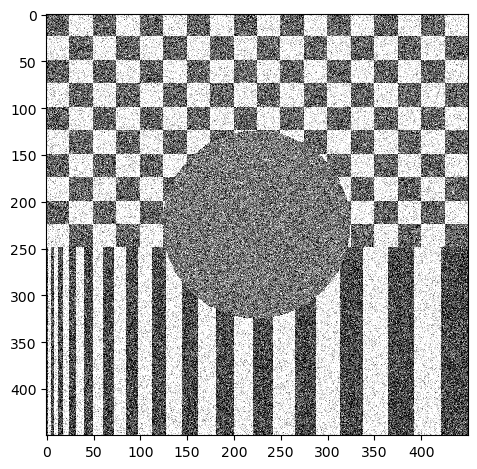

In [41]:
img_gauss = io.imread('data/Gaussian.png')
img_gauss = rgb2gray(img_gauss)
io.imshow(img_gauss, cmap = 'gray')
plt.show()

In [21]:
gauss1 = gaussian(img_gauss, 1)
gauss5 = gaussian(img_gauss, 5)
gauss10 = gaussian(img_gauss, 10)

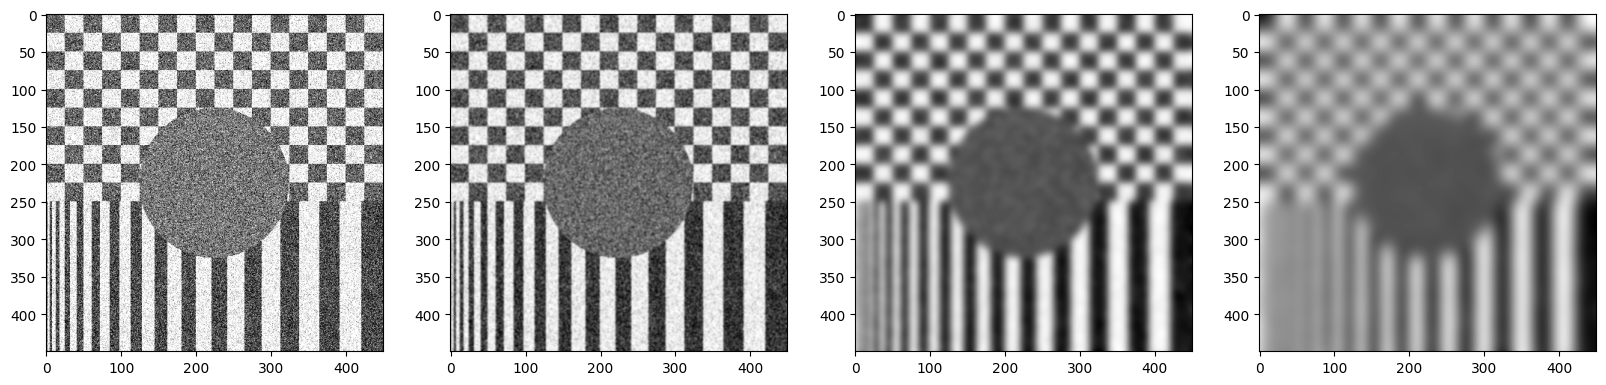

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(img_gauss, cmap = 'gray')
ax[1].imshow(gauss1, cmap = 'gray')
ax[2].imshow(gauss5, cmap = 'gray')
ax[3].imshow(gauss10, cmap = 'gray')
plt.show()

Mayor 
𝜎
σ: Más suavizado, menos ruido, pero mayor pérdida de detalles y bordes.

#### Exercise 7

In [23]:
car_img = io.imread('data/car.png')
car_gray = rgb2gray(car_img)

size = 10
car_mean = apply_mean_filter(car_gray, size)
car_median = apply_median_filter(car_gray, size)
car_gauss = gaussian(car_gray, size)

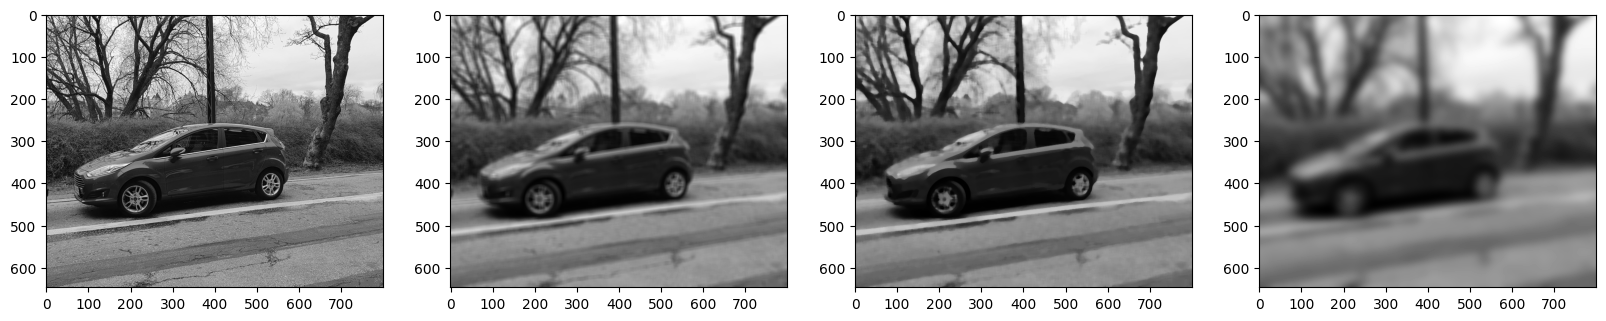

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(car_gray, cmap = 'gray')
ax[1].imshow(car_mean, cmap = 'gray')
ax[2].imshow(car_median, cmap = 'gray')
ax[3].imshow(car_gauss, cmap = 'gray')
plt.show()

                                            medai                                   mediana                       gauss
- Filtro Promedio: Suavizado uniforme, pérdida de bordes.
- Filtro Mediano: Elimina ruido impulsivo, preserva bordes mejor.
- Filtro Gaussiano: Suavizado gradual, balance entre reducción de ruido y preservación de bordes.

### Edge filters

 It means that there is a high pixel value gradient at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. 

The Prewitt filter is a simple gradient estimation filter. The Python version of the Prewitt filter can estimate the horizontal gradient using the prewitt_h filter, the vertical gradient with the prewitt_v filter and the magnitude of the edges using the prewitt filter. The magnitude is computed as

In [43]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

from skimage.util import img_as_ubyte, img_as_float

#### Exercise 8

Try to filter the donald_1.png photo with the prewitt_h and prewitt_v filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [48]:
img_org = io.imread('data/donald_1.png')
img_gray = rgb2gray(img_org) # as always antes del filtro un rgb2 gray
# para sacar las dos componentes la 
img_h = prewitt_h(img_gray) # horizotal
img_v = prewitt_v(img_gray) # vertical


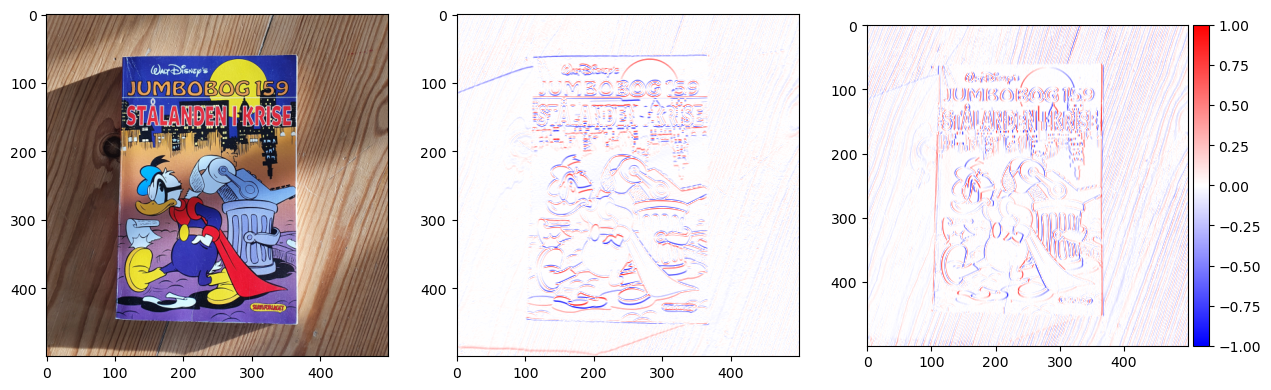

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
# normal
ax[0].imshow(img_org)
#horizontal                 bwr es pa hacerse el chulo y Negativo (rojo): Indica cambios hacia la izquierda.Positivo (azul): Indica cambios hacia la derecha.
ax[1].imshow(img_h, cmap = 'bwr', vmin = -1, vmax = 1) # coge todo lo horizontal
# vertical
im = ax[2].imshow(img_v, cmap = 'bwr', vmin = -1, vmax = 1)  # coge todo lo vertical
# todo esto es para la bara de color 
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

- Segunda columna: Gradientes o cambios en la dirección horizontal.
- Tercera columna: Gradientes o cambios en la dirección vertical

#### Exercise 9
Use the prewitt filter on donald_1.png. What do you see?

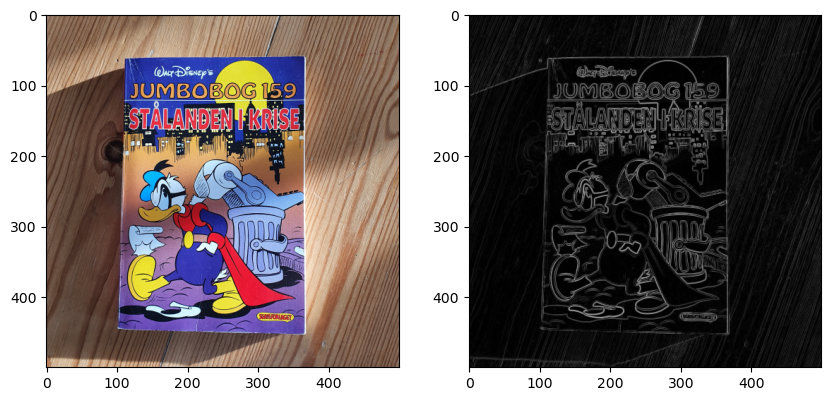

In [61]:
img_org = io.imread('data/donald_1.png')
img_gray = rgb2gray(img_org) # as always antes del filtro un rgb2 gray
img_prewitt = prewitt(img_gray)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_prewitt, cmap = 'gray', vmin = 0, vmax = 1)  # los valores s eponene para que aun haya más dfierencia con el background 
plt.show()

### Edge detection in medical images

#### Exercise 10

The goal of this exercise is to detect the edges that seperates the bone from the soft tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

Read the CT image
Filter the image using either a Gaussian filter or a median filter
Compute the gradients in the filtered image using a Prewitt filter
Use Otsu's thresholding method to compute a threshold, T, in the gradient image
Apply the threshold, T, to the gradient image to create a binary image.
The final binary should contain the edges we are looking for. It will probably contain noise as well. We will explore methods to remove this noise later in the course.


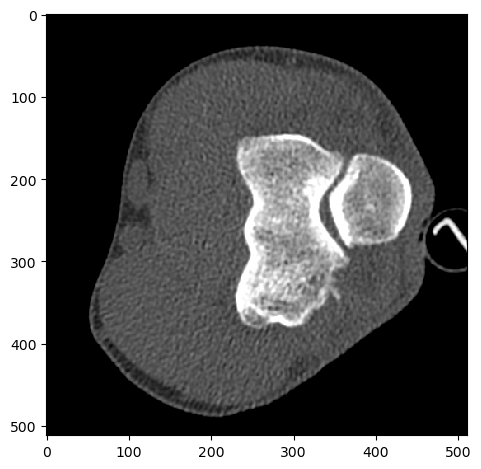

In [62]:
img_org = io.imread('data/ElbowCTSlice.png')
img_org = rgb2gray(img_org)
io.imshow(img_org)
io.show()

In [65]:
def edge_detection(img, filter_type, kernel_size, thres, plot = False):
    '''
    img: (2D ndarray)
    filter_type: (str) 'gaussian' or 'median'
    kernel_size: (int) size of the smoothing filter
    thres: (float) threshold for the binarization
    plot: (bool) whether plot the images. Default False.
    '''

    if filter_type == 'gaussian':
        img_filt = gaussian(img, kernel_size)
    elif filter_type == 'median':
        img_filt = apply_median_filter(img, kernel_size)
    #gradient despues de un gaussian o median
    gradients = prewitt(img_filt)
    # luego le metes a un 
    edges = gradients > thres
    print(gradients.dtype,edges.dtype)
    if plot:
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
        ax[0].imshow(img_filt, cmap = 'gray')
        ax[1].imshow(gradients, cmap = 'gray')
        ax[2].imshow(edges, cmap = 'gray')
        [ax_.set_axis_off() for ax_ in ax]
        plt.show()

    return edges

float64 bool


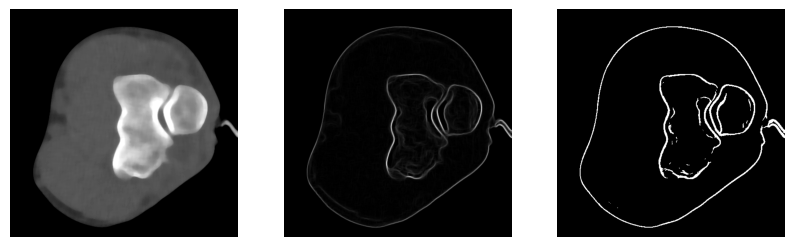

float64 bool


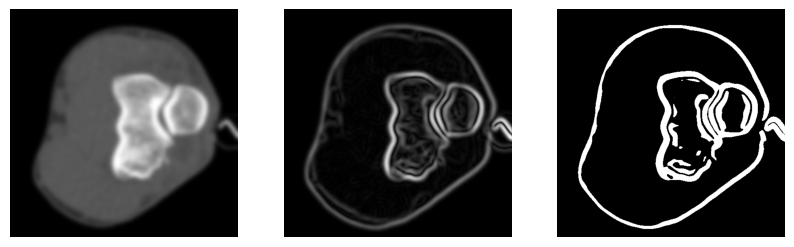

In [66]:
edges = edge_detection(img_org, 'median', 15, 0.05, True)
edges = edge_detection(img_org, 'gaussian', 5, 0.02, True)

### Video filtering

Check the function video_filtering.py, in particular the last lines inside "if __name__ == '__main__'" to understand what the arguments mean

#### Exercise 11

Now try to make a small program, that acquires video from your webcam/telephone, filters it and shows the filtered output.

In [67]:
# Only prewitt
!python video_filtering.py 1 0 0

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


In [34]:
# Only prewitt, otsu
!python video_filtering.py 1 1 0

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


#### Exercise 12

In [35]:
# Only prewitt, otsu, median
!python video_filtering.py 1 1 1

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
